In [2]:
import numpy as np
import matplotlib.pyplot as plt

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='Counts'>)

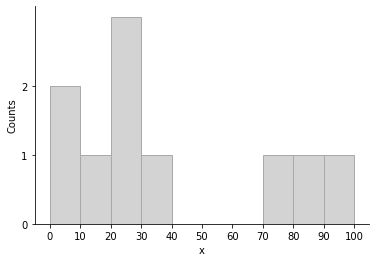

In [3]:
def pretty_hist(x, bins, binlabels=None, countslabels=None, color = "lightgray", edgecolor = "darkgray", plotlog=False):
    if binlabels is None:
        binlabels = bins

    fig, ax = plt.subplots(1,1)
    h = ax.hist(x, bins=bins, color=color, edgecolor=edgecolor, log=plotlog)

    if countslabels is None:
        countslabels = range(int(np.max(h[0])))

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_yticks(countslabels)
    ax.set_xticks(binlabels)
    ax.set_xlabel("x")
    ax.set_ylabel("Counts")
    fig.patch.set_facecolor('white')

    plt.plot()
    return (fig, ax)

x = [5, 7, 10, 22, 35, 88, 26, 74, 22, 95]
pretty_hist(x, range(0, 110, 10))


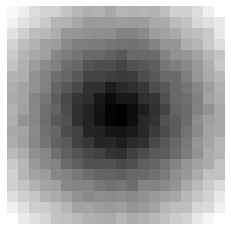

(20, 20)
13
177


In [4]:
np.random.seed(12345)

x_axis = np.linspace(-1, 1, 20)[:, None]
y_axis = np.linspace(-1, 1, 20)[None, :]

img = np.sqrt(x_axis ** 2 + y_axis ** 2)
img = img / (1.5*np.max(img)) * 255
img = img.astype(int) + np.random.choice(range(10), size = (20, 20))


plt.imshow(img, cmap="gray")
plt.axis("off")

plt.show()

print(img.shape)
print(np.min(img))
print(np.max(img))

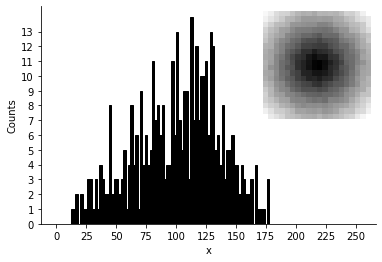

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = pretty_hist(img.ravel(), range(0,255,2), range(0, 255, 25), edgecolor="black", color="black")

axins = inset_axes(ax, width=1.5, height=1.5)
axins.axis("off")
axins.imshow(img, cmap="gray")

plt.show()

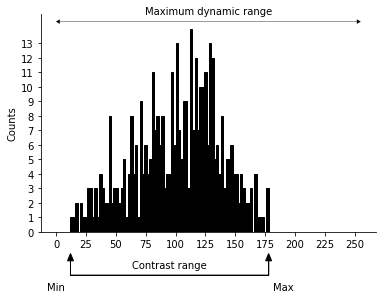

In [6]:
fig, ax = pretty_hist(img.ravel(), range(0,255,2), range(0, 255, 25), edgecolor="black", color="black")

ax.arrow(12, -3, 0, 1, head_width=5, head_length=.5, clip_on=False, color="black")
ax.arrow(178, -3, 0, 1, head_width=5, head_length=.5, clip_on=False, color="black")
ax.text(0, -4, "Min", ha="center")
ax.text(190, -4, "Max", ha="center")
ax.arrow(12, -3, 166, 0, color="black", clip_on=False)
ax.text(95, -2.5, "Contrast range", ha="center")
ax.arrow(0, 14.5, 255, 0, color="black", head_width=0.3, head_length=3, clip_on=False, length_includes_head=True, lw=0.1)
ax.arrow(255, 14.5, -255, 0, color="black", head_width=0.3, head_length=3, clip_on=False, length_includes_head = True, lw=0.1)
ax.text(127.5, 15, "Maximum dynamic range", ha="center")
ax.set_ylim(0, 15)
ax.set_xlabel("")
plt.show()

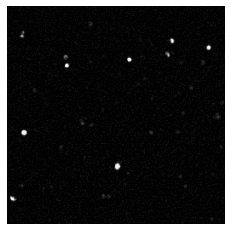

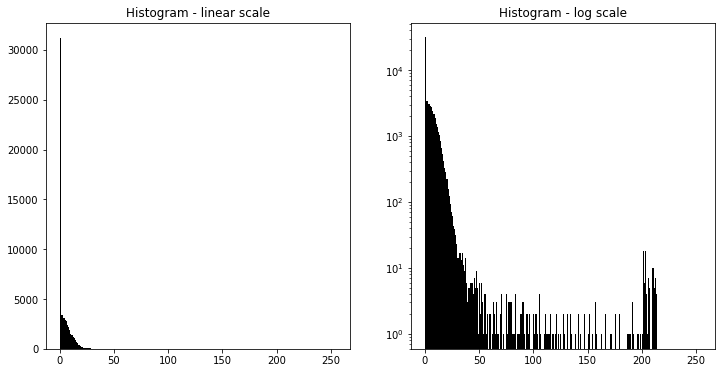

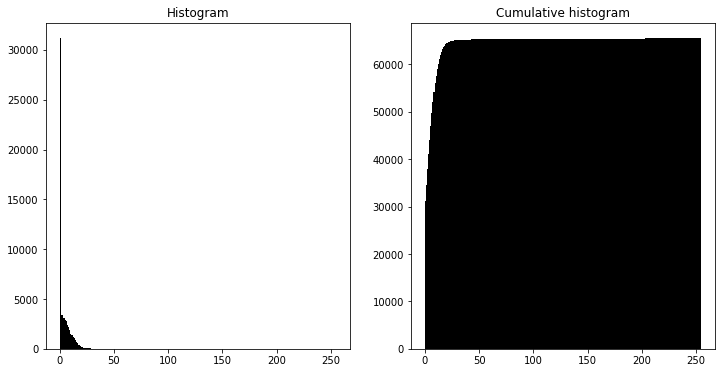

In [7]:
from skimage import io

corticotrophs = io.imread("pit_cells.tif")
plt.imshow(corticotrophs, cmap="gray")
plt.axis("off")
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(corticotrophs.ravel(), bins=range(256), color="black")
ax[1].hist(corticotrophs.ravel(), bins=range(256), color="black", log=True)
ax[0].set_title("Histogram - linear scale")
ax[1].set_title("Histogram - log scale")
plt.show()

fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].hist(corticotrophs.ravel(), bins=range(256), color="black")
ax[1].hist(corticotrophs.ravel(), bins=range(256), color="black", 
cumulative=True)
ax[0].set_title("Histogram")
ax[1].set_title("Cumulative histogram")
plt.show()

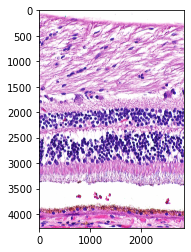

(4272, 2848, 3)
uint8


In [8]:
from skimage import io
retina = io.imread("RetinaHnE.jpg")
plt.imshow(retina)
plt.show()
print(retina.shape)
print(retina.dtype)

[]

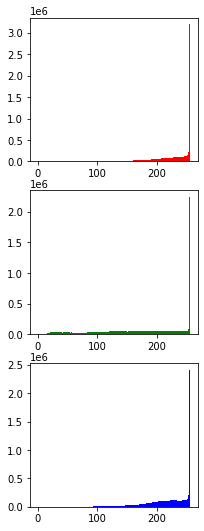

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(3,9))

ax[0].hist(retina[:, :, 0].ravel(), range(256), color="red")
ax[1].hist(retina[:, :, 1].ravel(), range(256), color="green")
ax[2].hist(retina[:, :, 2].ravel(), range(256), color="blue")

plt.plot()

[]

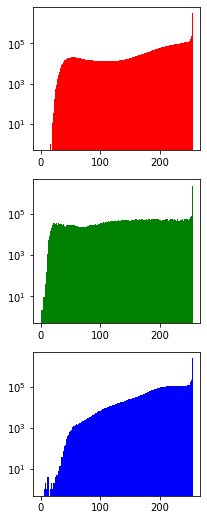

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(3,9))

ax[0].hist(retina[:, :, 0].ravel(), range(256), color="red", log=True)
ax[1].hist(retina[:, :, 1].ravel(), range(256), color="green", log=True)
ax[2].hist(retina[:, :, 2].ravel(), range(256), color="blue", log=True)

plt.plot()

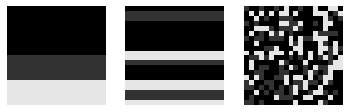

In [11]:
rng = np.random.default_rng()

img1 = np.zeros((20, 20), dtype=np.uint8)
img1[10:15] = 50
img1[15:] = 230

fig, ax = plt.subplots(1, 3)
ax[0].imshow(img1, cmap="gray", vmax=255)
rng.shuffle(img1, axis=0)
img1.reshape(20, 20)
ax[1].imshow(img1, cmap="gray", vmax=255)
rng.shuffle(img1.ravel())
img1.reshape(20, 20)
ax[2].imshow(img1, cmap="gray", vmax=255)

for a in ax:
    a.axis("off")
plt.show()



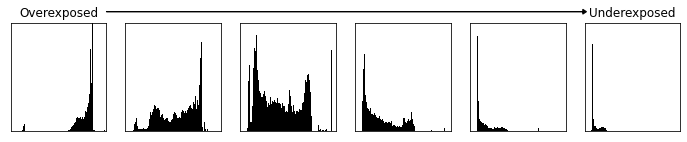

In [12]:
xray = io.imread("xray_brightness_Veldkamp_2009.png")
xray = xray[10:200]

fig, ax = plt.subplots(1, 6, figsize = (12, 2))
ax[0].hist(xray[:,10:170].ravel(), range(256), color="black")
ax[1].hist(xray[:,180:340].ravel(), range(256), color="black")
ax[2].hist(xray[:,350:510].ravel(), range(256), color="black")
ax[3].hist(xray[:,530:690].ravel(), range(256), color="black")
ax[4].hist(xray[:,700:860].ravel(), range(256), color="black")
ax[5].hist(xray[:,875:-10].ravel(), range(256), color="black")

for a in ax:
    a.set_xticks([])
    a.set_yticks([])

ax[0].set_title("Overexposed")
ax[5].set_title("Underexposed")

ax[0].arrow(255, 2200, 1280, 0, color="black", head_width=90, head_length=10, clip_on=False, length_includes_head=True, lw=1)
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 2000)

plt.show()

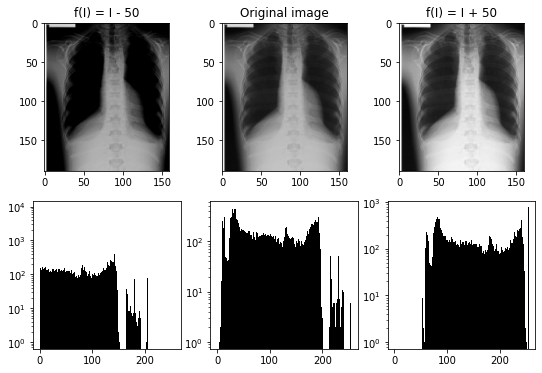

In [13]:
def change_lum(x, offset):
    res = x + offset
    if res < 0:
        res = 0
    if res > 255:
        res = 255
    return (res)

v_change_lum = np.vectorize(change_lum)



xray2 = xray[:, 350:510]
xray2_over = v_change_lum(xray2, 50)
xray2_under = v_change_lum(xray2, -50)

fig, ax = plt.subplots(2, 3, figsize=(9, 6))

ax[0,0].imshow(xray2_under, cmap="gray")
ax[0,1].imshow(xray2, cmap="gray")
ax[0,2].imshow(xray2_over, cmap="gray")

ax[0,0].set_title("f(I) = I - 50")
ax[0,1].set_title("Original image")
ax[0,2].set_title("f(I) = I + 50")

ax[1,0].hist(xray2_under.ravel(), bins = range(256), color="black", log=True)
ax[1,1].hist(xray2.ravel(), bins = range(256), color="black", log=True)
ax[1,2].hist(xray2_over.ravel(), bins = range(256), color="black", log=True)
plt.show()

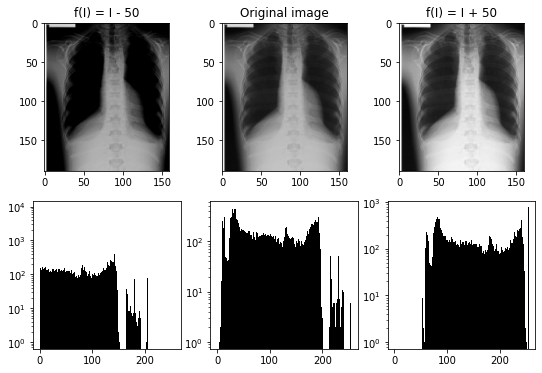

In [14]:
from skimage import img_as_float, img_as_ubyte

def change_brightness(img, offset):
    """
    Changes the brightness of an image
    img: the image
    offset: the brightness offset to apply
    """

    img2 = img_as_float(img)
    img2 += offset/255
    img2 = np.clip(img2, 0, 1)

    return (img_as_ubyte(img2))

xray2 = xray[:, 350:510]
xray2_over = change_brightness(xray2, 50)
xray2_under = change_brightness(xray2, -50)

fig, ax = plt.subplots(2, 3, figsize=(9, 6))

ax[0,0].imshow(xray2_under, cmap="gray")
ax[0,1].imshow(xray2, cmap="gray")
ax[0,2].imshow(xray2_over, cmap="gray")

ax[0,0].set_title("f(I) = I - 50")
ax[0,1].set_title("Original image")
ax[0,2].set_title("f(I) = I + 50")

ax[1,0].hist(xray2_under.ravel(), bins = range(256), color="black", log=True)
ax[1,1].hist(xray2.ravel(), bins = range(256), color="black", log=True)
ax[1,2].hist(xray2_over.ravel(), bins = range(256), color="black", log=True)
plt.show()

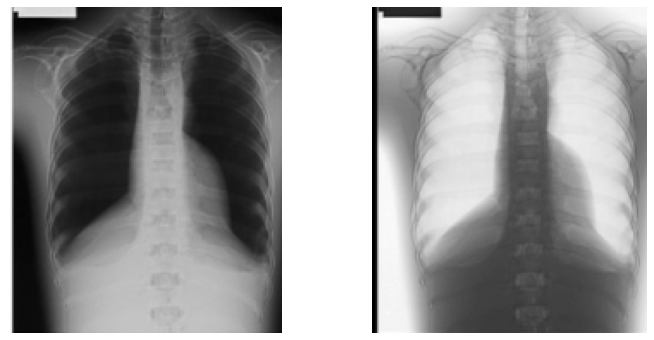

In [15]:
def invert_image(img):
    """
    Inverst an image
    img: the image
    """
    return (255 - img)

xray2 = xray[:, 350:510]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(xray2, cmap="gray")
ax[1].imshow(invert_image(xray2), cmap="gray")
for a in ax:
    a.axis("off")
plt.show()

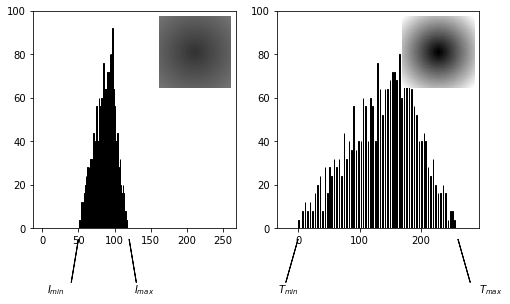

In [16]:
from skimage.exposure import rescale_intensity

np.random.seed(12345)

x_axis = np.linspace(-0.5, 0.5, 50)[:, None]
y_axis = np.linspace(-0.5, 0.5, 50)[None, :]

img = np.sqrt(x_axis ** 2 + y_axis ** 2)
img = img / (1.5*np.max(img)) * 100 + 50
img = img.astype(int)

fig, ax = plt.subplots(1, 2, figsize = (8, 4))

img_2 = rescale_intensity(img, out_range=(0, 255))

ax[0].hist(img.ravel(), range(256), color="black", edgecolor="black")
ax[1].hist(img_2.ravel(), range(256), color="black", edgecolor="black")

fig.text(.15, -0.1, "$I_{min}$")
fig.text(.3, -0.1, "$I_{max}$")
fig.text(.55, -0.1, "$T_{min}$")
fig.text(.9, -0.1, "$T_{max}$")
ax[0].arrow(40, -25, 10, 20, head_length=0, length_includes_head = True, clip_on=False, color = "black")
ax[0].arrow(130, -25, -10, 20, head_length=0, length_includes_head = True, clip_on=False, color = "black")
ax[0].set_ylim((0, 100))
ax[1].arrow(-20, -25, 20, 20, head_length=0, 
length_includes_head = True, clip_on=False, color = "black")
ax[1].arrow(280, -25, -20, 20, head_length=0, length_includes_head = True, clip_on=False, color = "black")
ax[1].set_ylim((0, 100))

axins = inset_axes(ax[0], width=1, height=1)
axins.axis("off")
axins.imshow(img, cmap="gray", vmin=0, vmax=255)
axins2 = inset_axes(ax[1], width=1, height=1)
axins2.axis("off")
axins2.imshow(img_2, cmap="gray", vmin=0, vmax=255)

plt.show()

[]

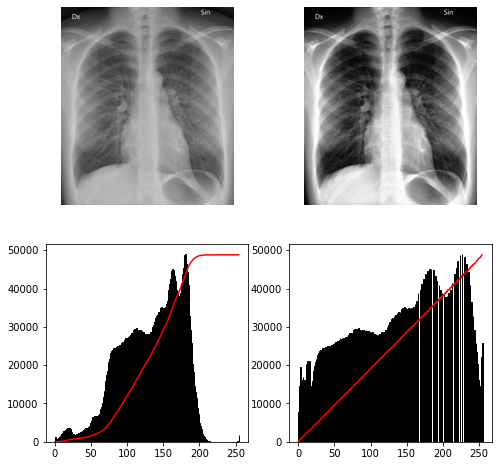

In [17]:
from skimage.exposure import equalize_hist

chest = io.imread("chest_xray.jpg")
chest = chest[:,:,0]
chest_eq = equalize_hist(chest)
chest_eq = img_as_ubyte(chest_eq)

fig, ax = plt.subplots(2, 2, figsize=(8,8))

ax[0,0].imshow(chest, cmap="gray")
ax[0,0].axis("off")
ax[0,1].imshow(chest_eq, cmap="gray")
ax[0,1].axis("off")
h = ax[1,0].hist(chest.ravel(), bins=range(256), color="black", edgecolor="black")
h_eq = ax[1,1].hist(chest_eq.ravel(), bins=range(256), color="black", edgecolor="black")
ax2 = ax[1,0].twinx()
ax2.plot(h[1][:-1], np.cumsum(h[0]), color="red")
ax2.set_ylim(0, 4.5e6)

ax3 = ax[1,1].twinx()
ax3.plot(h_eq[1][:-1], np.cumsum(h_eq[0]), color="red")
ax3.set_ylim(0, 4.5e6)

ax2.axis("off")
ax3.axis("off")

plt.plot()


In [18]:
coords = np.array([[1],[3]])
m = np.array([[1,0,3],[0,1,6]])
print(coords.shape)
print(m.shape)

print(m*coords)


(2, 1)
(2, 3)
[[ 1  0  3]
 [ 0  3 18]]


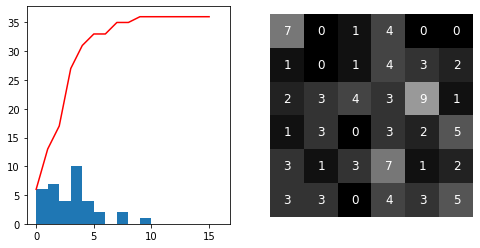

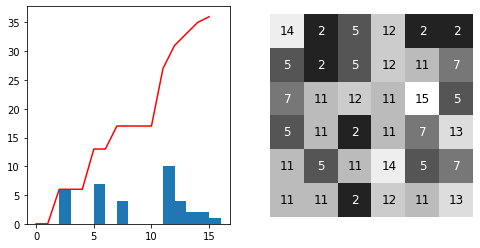

0 & 6 & 6 & 0.17 & 2 \\
1 & 7 & 13 & 0.36 & 5 \\
2 & 4 & 17 & 0.47 & 7 \\
3 & 10 & 27 & 0.75 & 11 \\
4 & 4 & 31 & 0.86 & 12 \\
5 & 2 & 33 & 0.92 & 13 \\
6 & 0 & 33 & 0.92 & 13 \\
7 & 2 & 35 & 0.97 & 14 \\
8 & 0 & 35 & 0.97 & 14 \\
9 & 1 & 36 & 1.00 & 15 \\
10 & 0 & 36 & 1.00 & 15 \\
11 & 0 & 36 & 1.00 & 15 \\
12 & 0 & 36 & 1.00 & 15 \\
13 & 0 & 36 & 1.00 & 15 \\
14 & 0 & 36 & 1.00 & 15 \\
15 & 0 & 36 & 1.00 & 15 \\


In [24]:
np.random.seed(12345)

img = np.array([[0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1], [1, 2, 2, 2, 2, 3],
[3, 3, 3, 3, 3, 3], [3, 3, 3, 4, 4, 4], [4, 5, 5, 7, 7, 9]])
rng = np.random.default_rng()
rng.shuffle(img.ravel())
img.reshape(6, 6)

fig, ax = plt.subplots(1, 2, figsize = (8, 4))

h = ax[0].hist(img.ravel(), range(17))
hc = np.cumsum(h[0])
ax[0].plot(h[1][:-1], hc, color="red")

new_val = np.floor(hc/36*15)

ax[1].imshow(img, vmin=0, vmax=15, cmap="gray")
ax[1].axis("off")
for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        ax[1].text(col, row, int(img[row, col]), horizontalalignment = "center", verticalalignment = "center", color="white", fontsize=12)

plt.show()

img_eq = img.copy()
for i in range(16):
    img_eq[img == i] = new_val[i]
plt.show()

fig, ax = plt.subplots(1, 2, figsize = (8, 4))

h2 = ax[0].hist(img_eq.ravel(), range(17))
ax[0].plot(h2[1][:-1], np.cumsum(h2[0]), color="red")

ax[1].imshow(img_eq, vmin=0, vmax=15, cmap="gray")
ax[1].axis("off")
for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if img_eq[row, col] > 10:
            color = "black"
        else:
            color = "white"

        ax[1].text(col, row, int(img_eq[row, col]), horizontalalignment = "center", verticalalignment = "center", color=color, fontsize=12)


plt.show()

# Create a LaTex table with the results
# Columns: Pixel value, Number of pixels, Cumulative hist, Cumulative normalized, New pixel value
for i in range(16):
    print(f"{i} & {int(h[0][i])} & {int(hc[i])} & {hc[i]/np.max(hc):.2f} & {(int)(new_val[i])} \\\\")


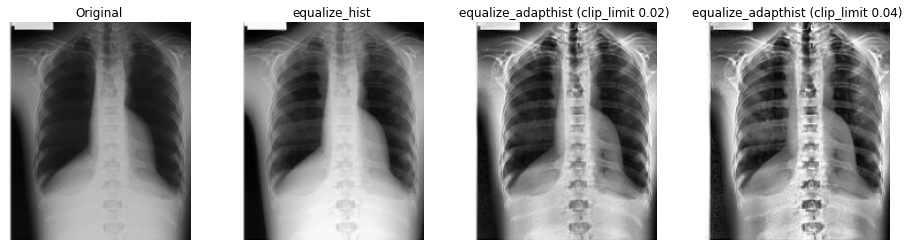

In [31]:
from skimage.exposure import equalize_hist, equalize_adapthist

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(16, 4))
ax[0].imshow(xray2, cmap="gray")
ax[1].imshow(equalize_hist(xray2), cmap="gray")
ax[2].imshow(equalize_adapthist(xray2, clip_limit=0.02), cmap="gray")
ax[3].imshow(equalize_adapthist(xray2, clip_limit=0.04), cmap="gray")

for a in ax:
    a.axis("off")

titles = ['Original', 'equalize_hist', 'equalize_adapthist (clip_limit 0.02)', 'equalize_adapthist (clip_limit 0.04)']

for i, a in enumerate(ax):
    a.set_title(titles[i])

plt.show()